In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import seaborn as sns
%matplotlib inline


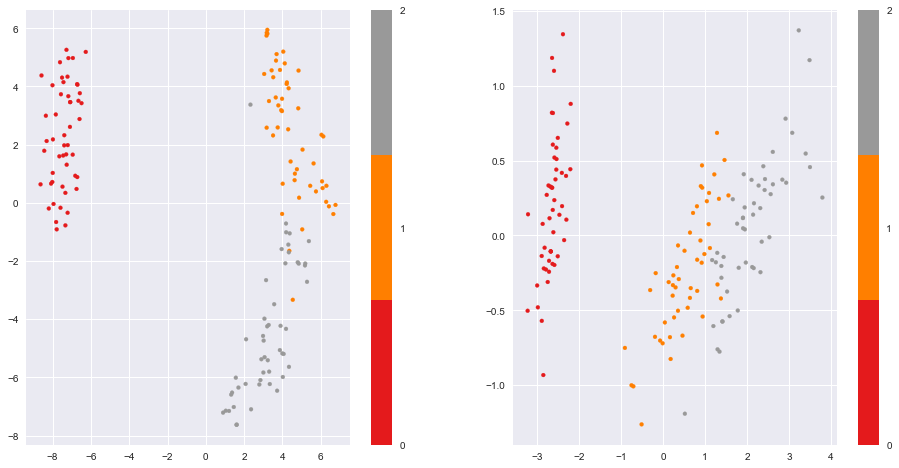

In [81]:
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA

iris = load_iris()
X_tsne = TSNE(learning_rate=100).fit_transform(iris.data)
X_pca = PCA().fit_transform(iris.data)

plt.figure(figsize=(16, 8))
plt.subplot(121)
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], s=15, c=iris.target, cmap=plt.cm.get_cmap("Set1", 3))
plt.colorbar(ticks=range(3))

plt.subplot(122)
plt.scatter(X_pca[:, 0], X_pca[:, 1], s=15, c=iris.target, cmap=plt.cm.get_cmap("Set1", 3))
plt.colorbar(ticks=range(3));

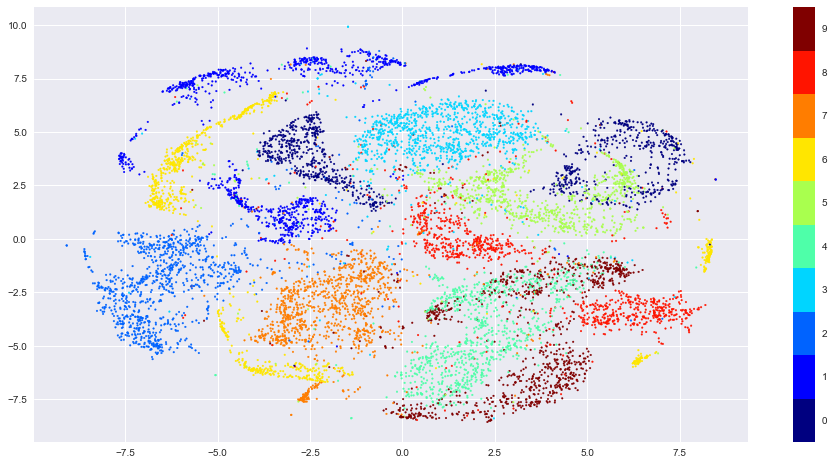

CPU times: user 6min 35s, sys: 1min 2s, total: 7min 37s
Wall time: 5min 43s


In [45]:
%%time
from sklearn.datasets import fetch_mldata
from sklearn.utils import shuffle
data = fetch_mldata('MNIST original', data_home='.')

X2 = data.data
y2 = data.target

X2, y2 = shuffle(X2, y2, random_state=1) # mix up dataset so we see a few of all digits

n = 10000
X2 = X2[:n]
y2 = y2[:n]

# perform t-SNE embedding
model = TSNE(n_components=2, random_state=0)
res = model.fit_transform(X2) 

plt.figure(figsize=(16,8))
plt.scatter(res[:,0], res[:,1], c=y2, s=3, cmap=plt.cm.get_cmap("jet", 10))
plt.colorbar(ticks=range(10))
plt.clim(-0.5, 9.5)
plt.show()

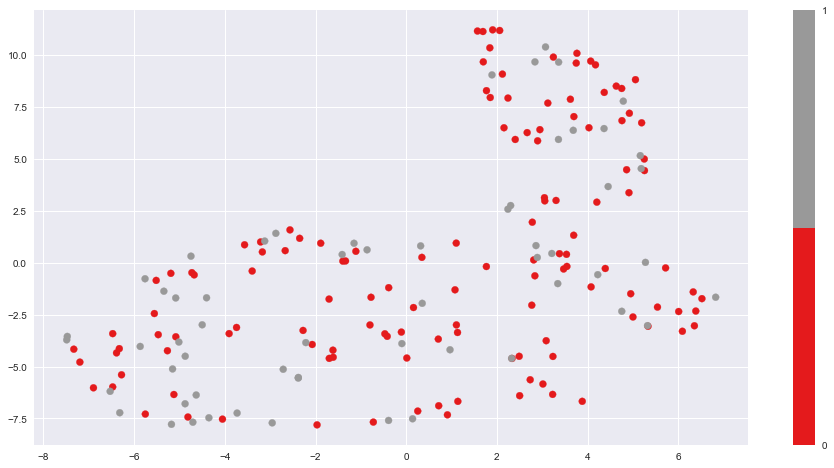

In [98]:
df = pd.read_csv('dataLOW3.csv').dropna(how='any') # example from Monash FIT5197 Assignment

X = df[['AGE', 'LWT', 'RACE', 'SMOKE', 'PTL', 'HT', 'UI']].values
y = df['LOW'].values

model = TSNE(learning_rate=100, n_components=2, random_state=1)
res = model.fit_transform(X) 

plt.figure(figsize=(16,8))
plt.scatter(res[:,0], res[:,1], c=y, cmap=plt.cm.get_cmap("Set1", 2))
plt.colorbar(ticks=range(2))
plt.show()